## Llibreries utilitzades

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from dataloader_module import load_data
from metrics_module import metrics
from imblearn.over_sampling import SMOTE
from graphs_module import plot_roc_auc


## Càrrega i pre-processament de les dades

In [21]:

# Càrrega i pre-processament de les dades
datafile = "data/healthcare-dataset-stroke-data.csv"
X, y = load_data(datafile)

# Dividir les dades en conjunts d'entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE per equilibrar les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


## Creació i test de KNN

Accuracy: 0.7077
Precision: 0.1100
Recall: 0.6226
F1 Score: 0.1870


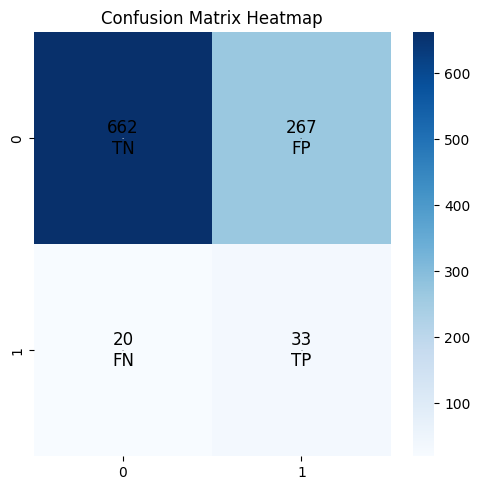

In [22]:

# Entrenar el model KNN amb les dades equilibrades
clf = KNeighborsClassifier()
clf.fit(X_train_resampled, y_train_resampled)

# Obtenir les probabilitats de predicció
y_proba = clf.predict_proba(X_test)[:, 1]

# Generar les prediccions amb el millor threshold
y_pred = (y_proba >= 0.2).astype(int)

# Guardar les prediccions en un fitxer .npy
np.save('predictions/predictions_knn.npy', y_pred)

# Avaluar el model
accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)


## ROC Curve i AUC

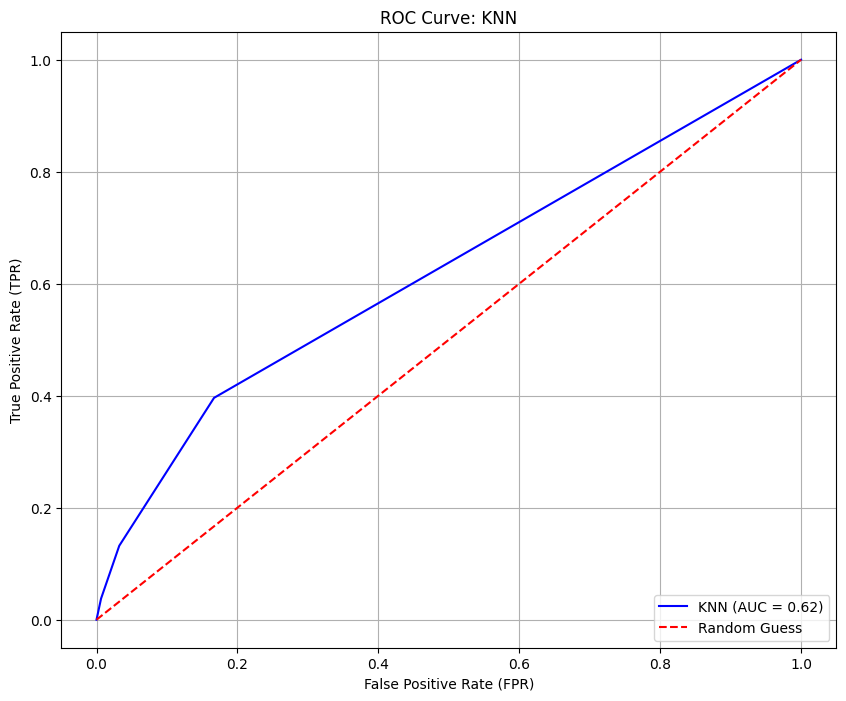

KNN AUC Score: 0.62


In [23]:
plot_roc_auc(clf, X_train, y_train, X_test, y_test, model_name="KNN")